This notebook is for testing the validity of warmup function.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report

from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

baseline = 0.5825, no warmup

seed warmup: 1234
length warmup: 0
Warmup data: 0


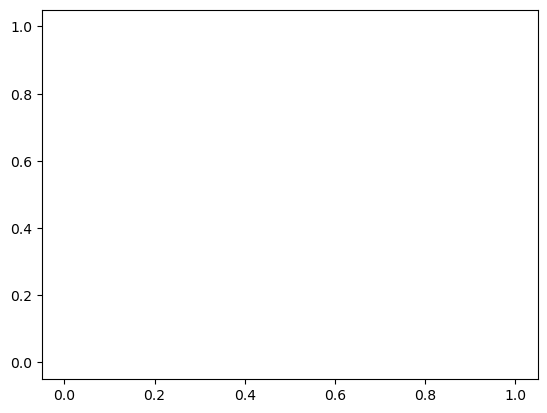

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: 0.4999998889492148
noise-free testing output
restarted
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


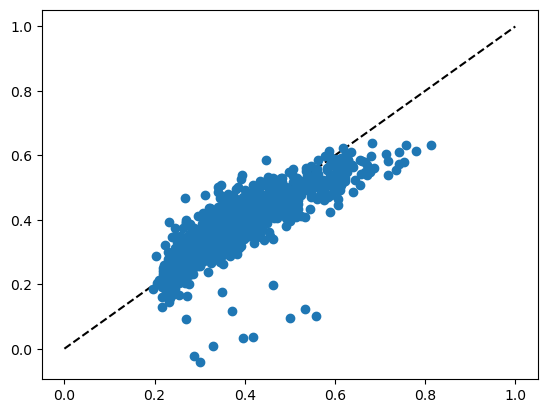

In [3]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 0

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add warmup, length = 50, nrmse = 0.62049

seed warmup: 1234
length warmup: 50
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49541871]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49541871]
noise-free testing output
restarted
Spacer NRMSE:0
0.004715300744673825 0.6204912389186418


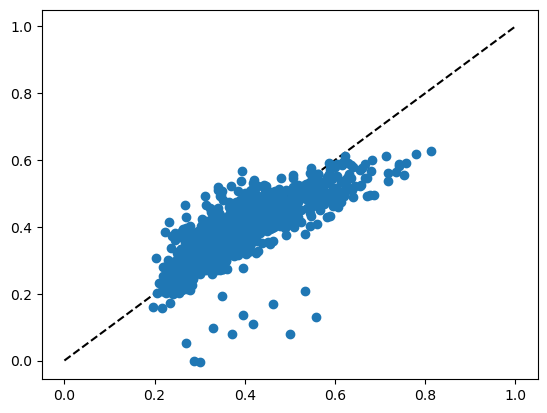

In [10]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 50

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

have a look at unrestart model with warm up, nrmse = 0.6238

seed warmup: 1234
length warmup: 20
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49634106]
noise-free training output
skip restarting..
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: test
p1 in test & fast: [0.49599308]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004767246812220442 0.6238996953542324


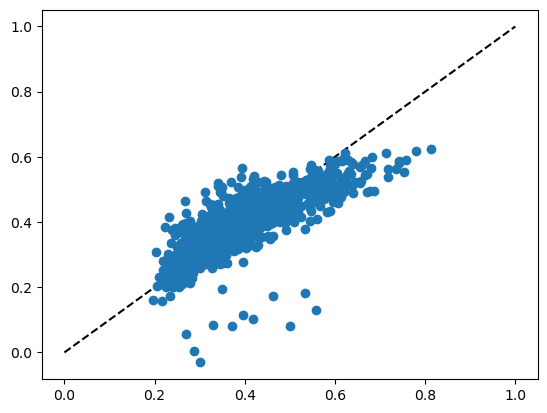

In [4]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 20

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Looks like warmup does work, but it is a negative influence. Let's have a look on the trace difference between warmup and coolup

seed warmup: 1234
length warmup: 0
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.50174584
current phase: train
p1 in train & fast: 0.50174584
noise-free training output
skip restarting..
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.50174584
current phase: test
p1 in test & fast: 0.50174584
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.011266435574543949 0.9591228194694021


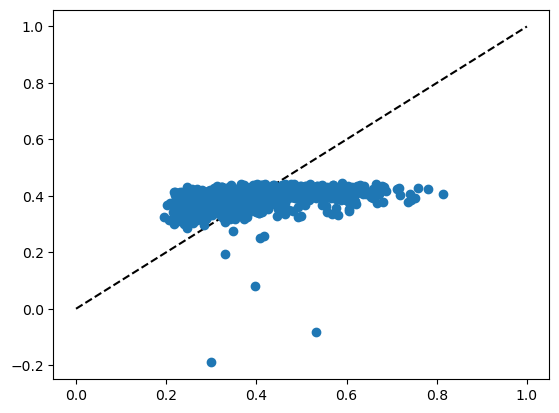

In [14]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 0

# Net parameters
Nvirt = 1
m0 = 1
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=0.50174584)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_train_f,y_train_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)


seed warmup: 1234
length warmup: 10
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.50174584
current phase: train
p1 in train & fast: [0.94537699]
noise-free training output
skip restarting..
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.50174584
current phase: test
p1 in test & fast: [0.94537699]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.010334145338351388 0.9185826485795843


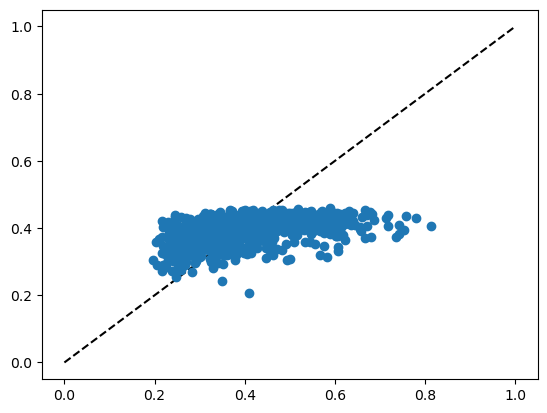

In [15]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 10

# Net parameters
Nvirt = 1
m0 = 1
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spnw = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=0.50174584)
transformw = spnw.gen_signal_fast_delayed_feedback

# run
(y_train_w,y_train_pred_w) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformw,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

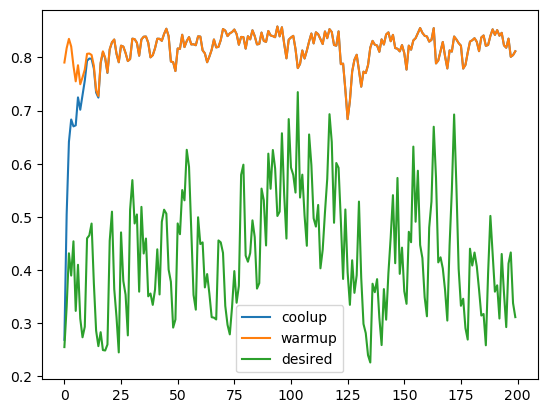

In [16]:
spac = 0
window = 200

# ploy
plt.figure()
plt.plot(y_train_pred_f[spac:spac+window],label='coolup')
plt.plot(y_train_pred_w[spac:spac+window],label='warmup')
plt.plot(y_train_f[spac:spac+window],label='desired')
plt.legend()
plt.show()

do a heatmap to find a suitable combination between p1 and length of warmup, as a start.

Primep1 loop:   0%|          | 0/10 [00:00<?, ?it/s]

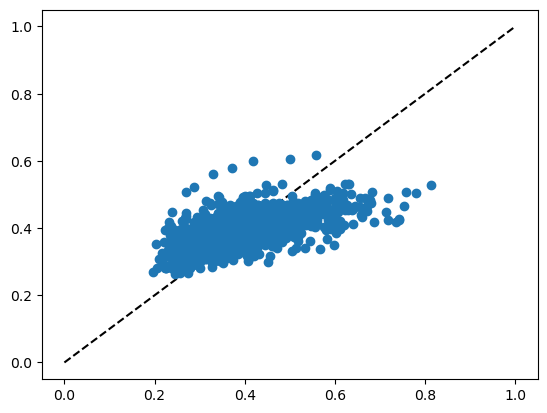

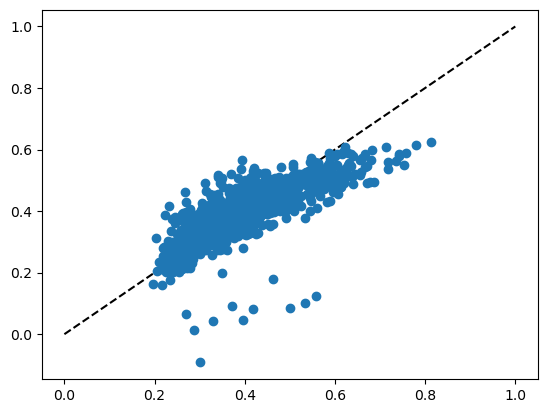

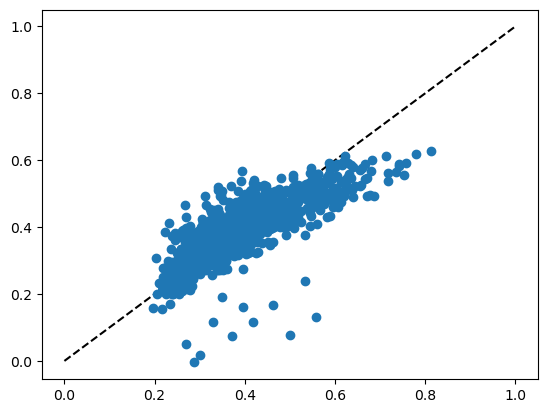

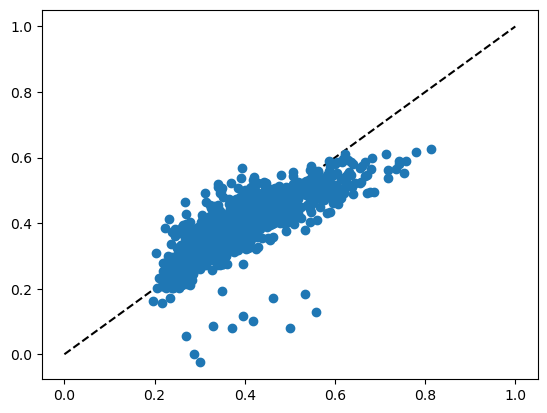

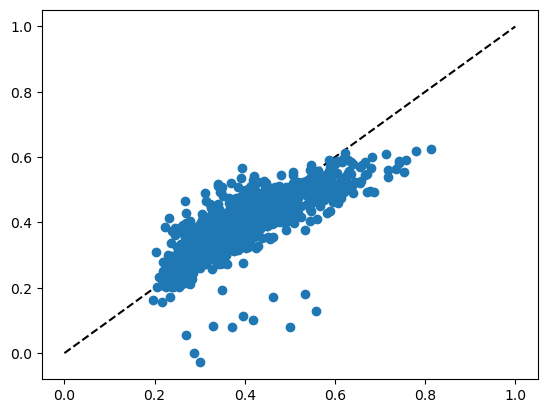

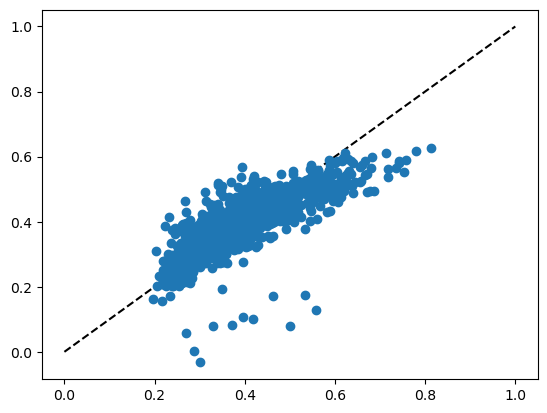

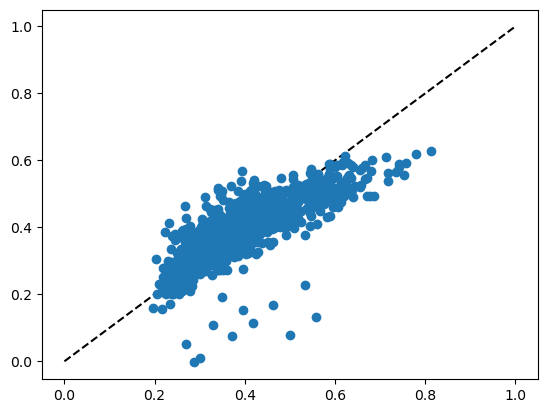

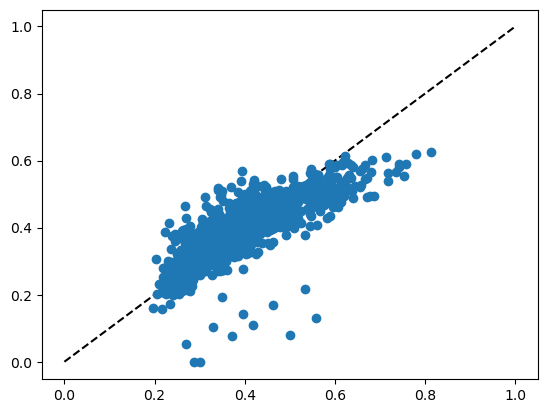

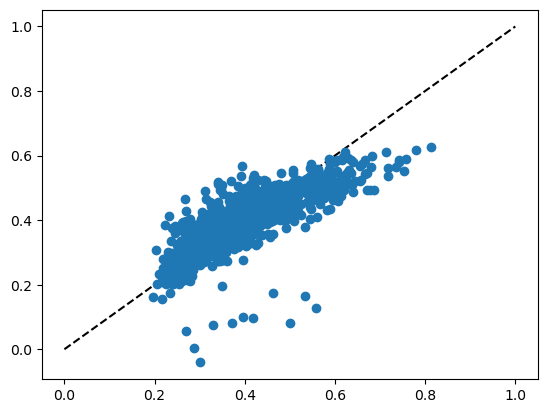

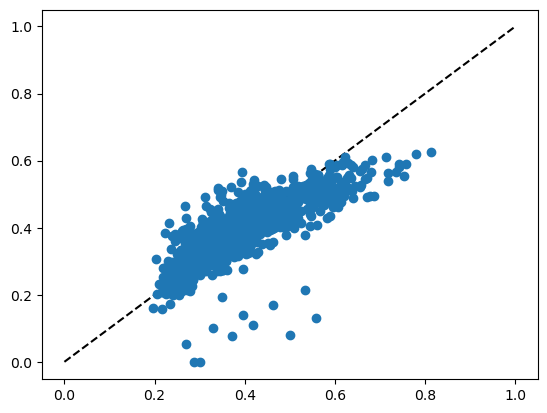

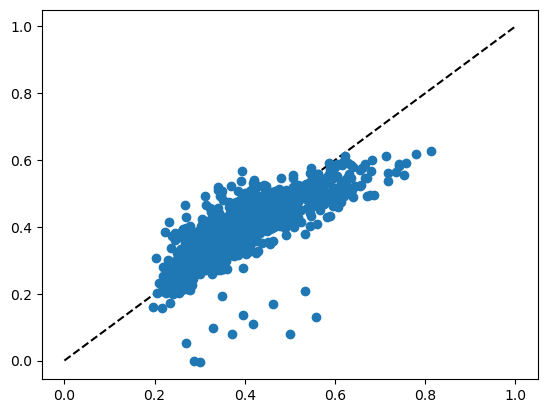

Primep1 loop:  10%|█         | 1/10 [02:59<26:51, 179.06s/it]

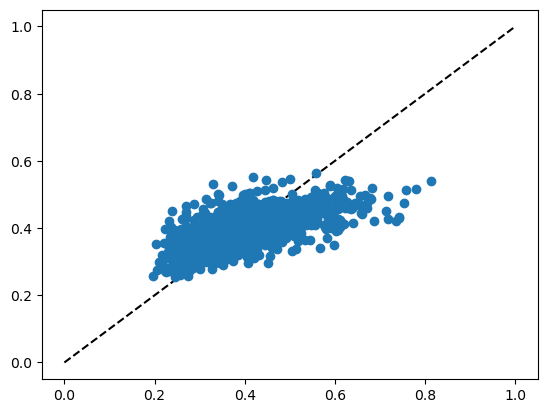

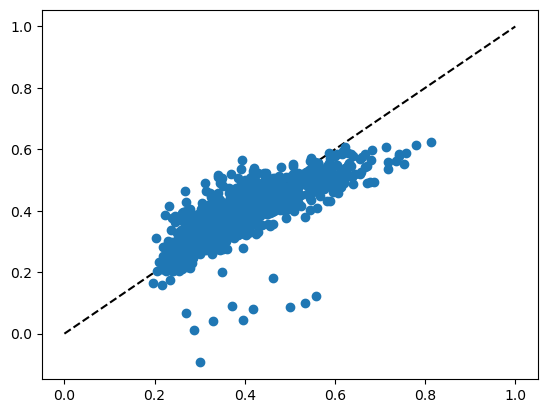

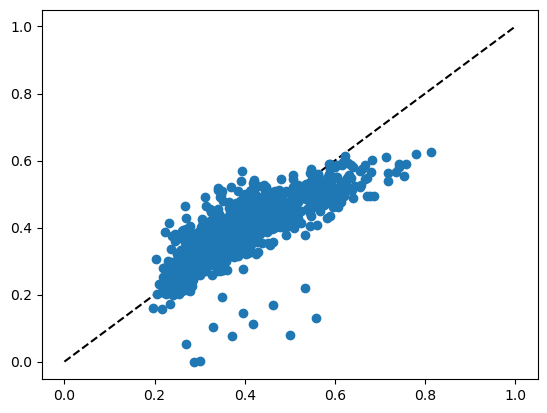

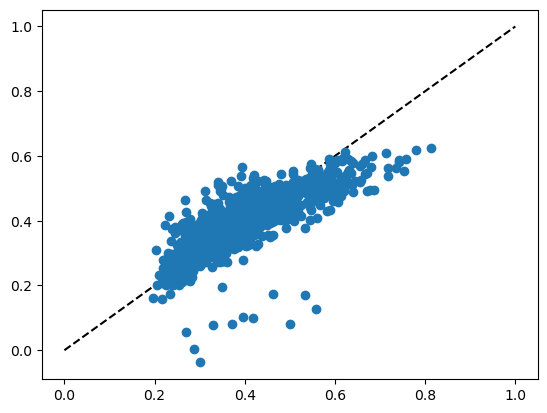

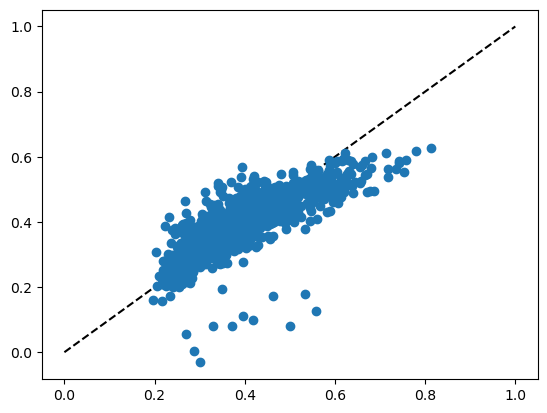

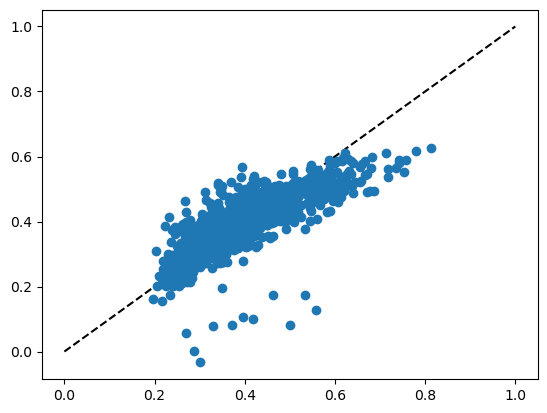

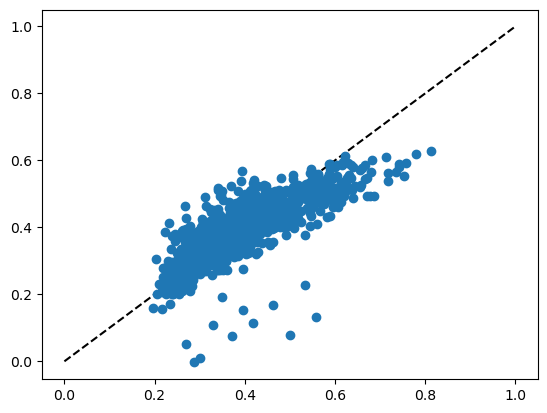

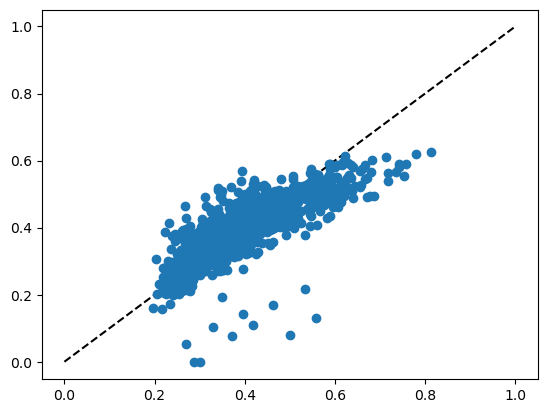

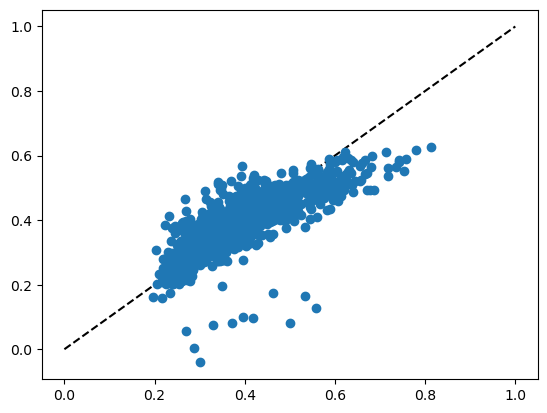

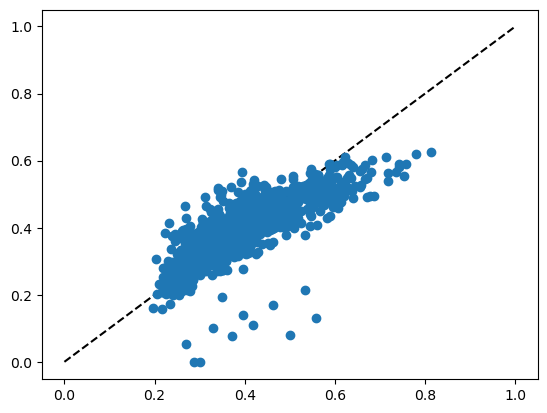

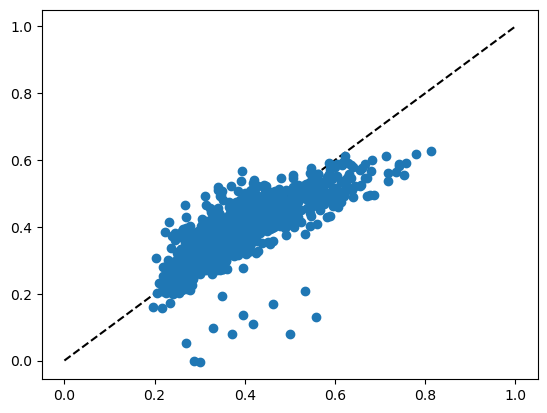

Primep1 loop:  20%|██        | 2/10 [06:00<24:02, 180.36s/it]

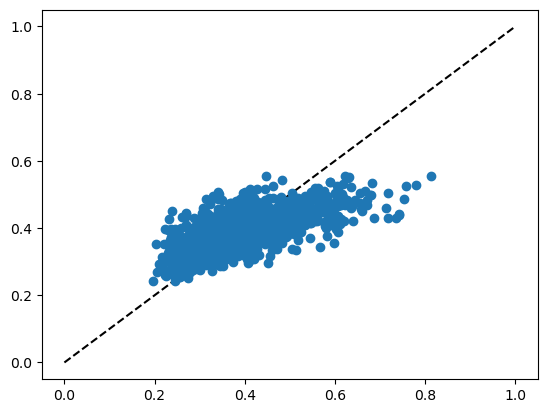

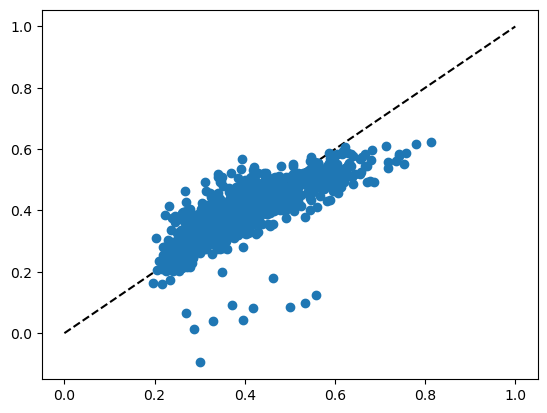

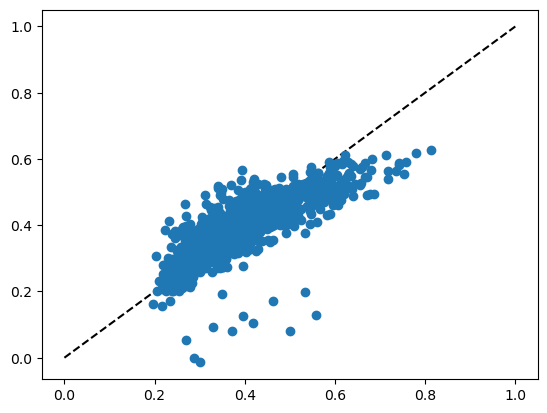

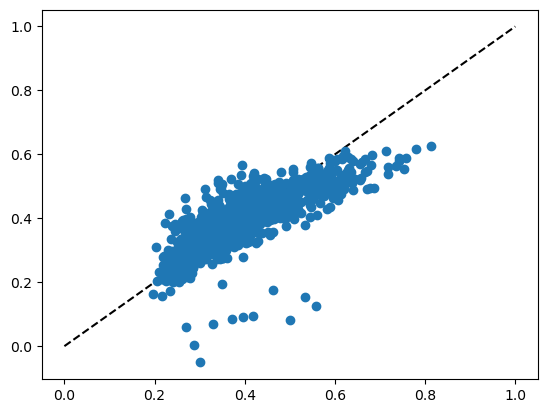

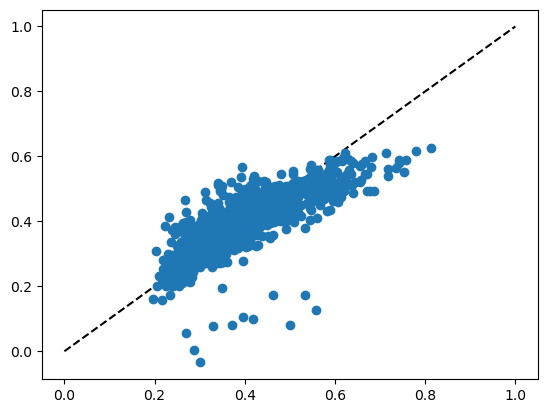

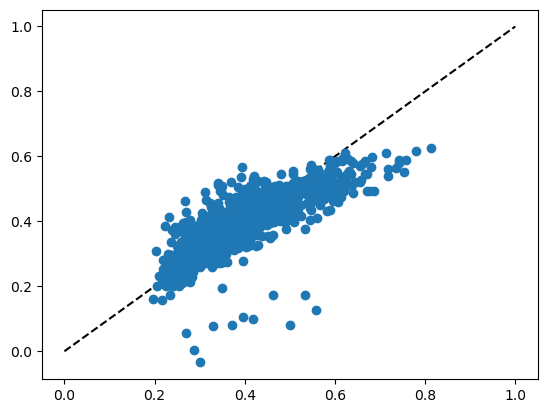

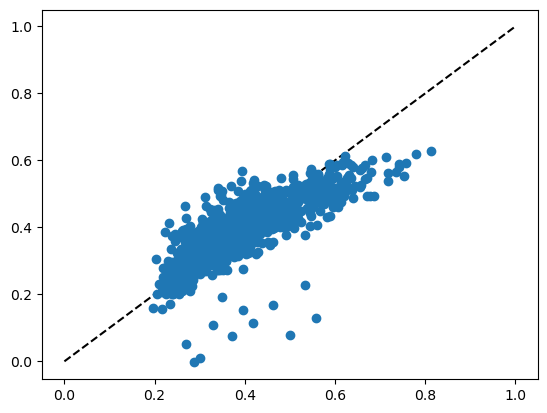

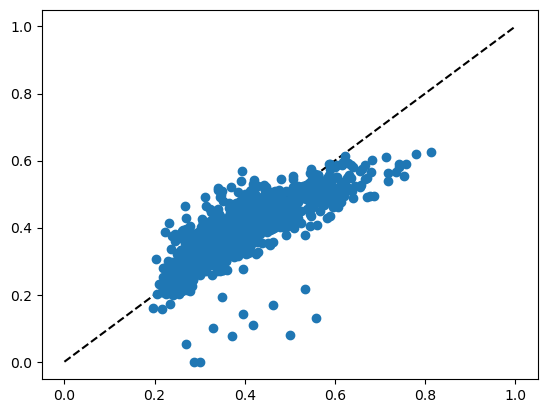

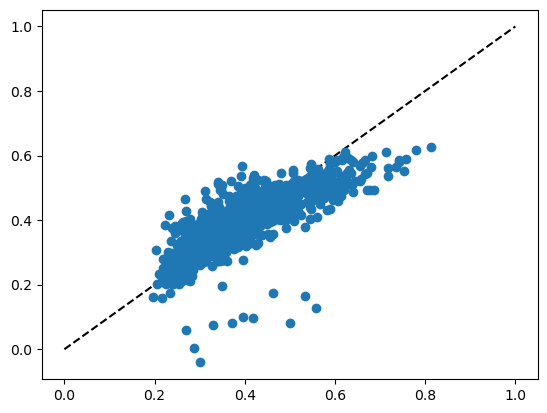

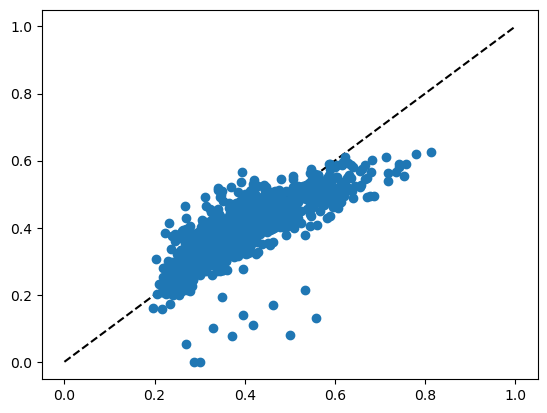

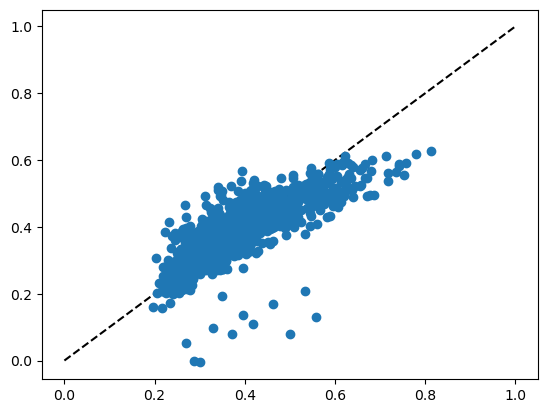

Primep1 loop:  30%|███       | 3/10 [08:59<20:59, 179.86s/it]

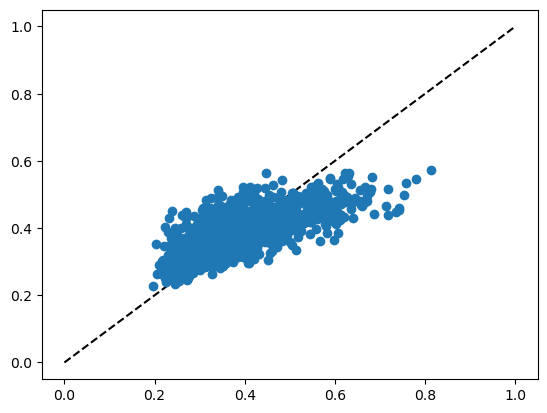

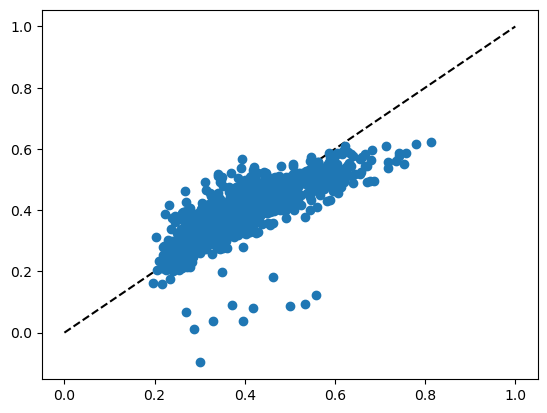

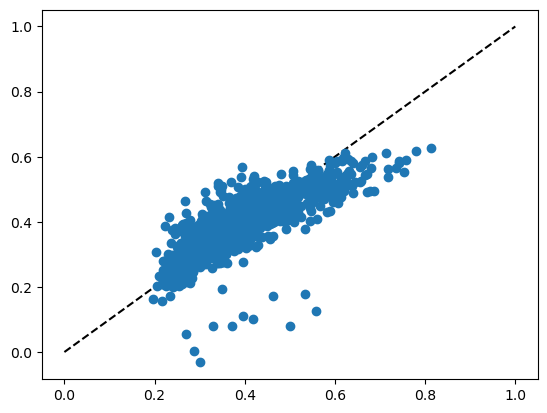

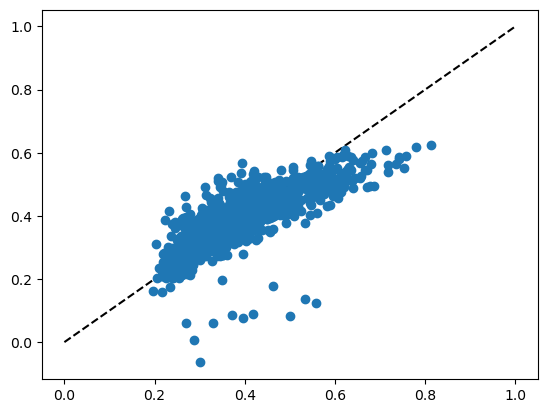

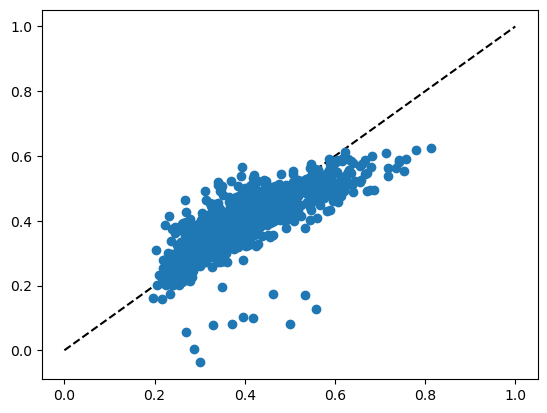

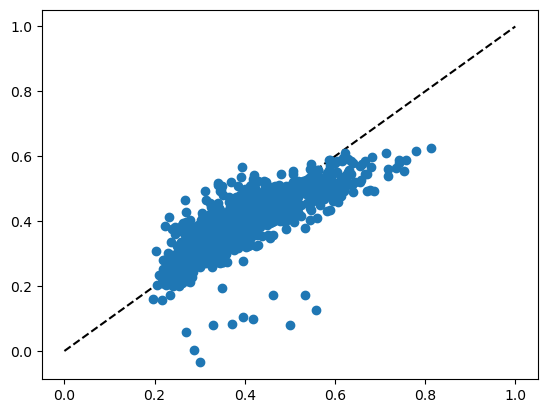

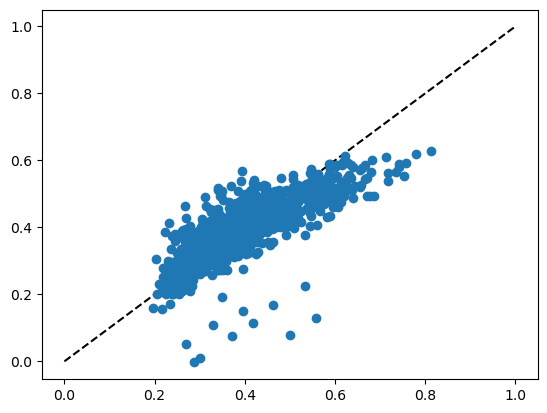

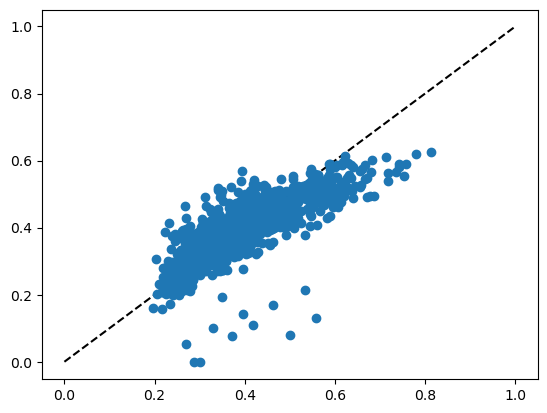

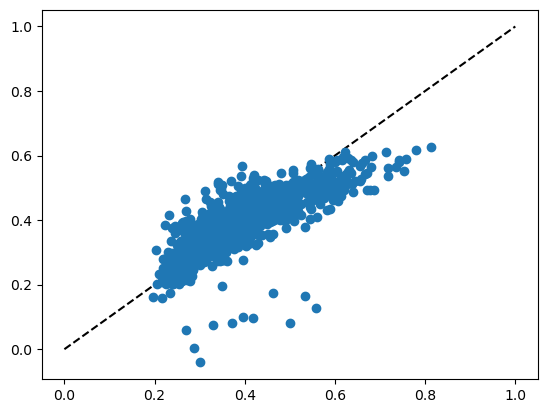

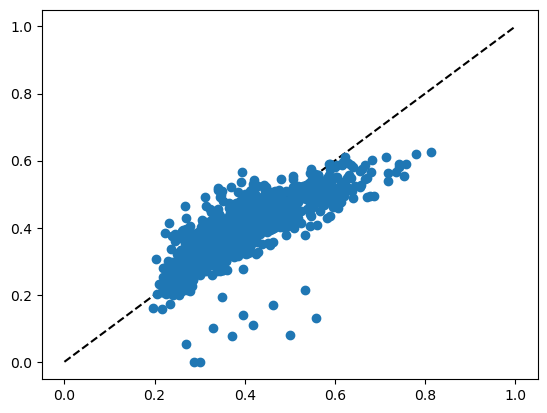

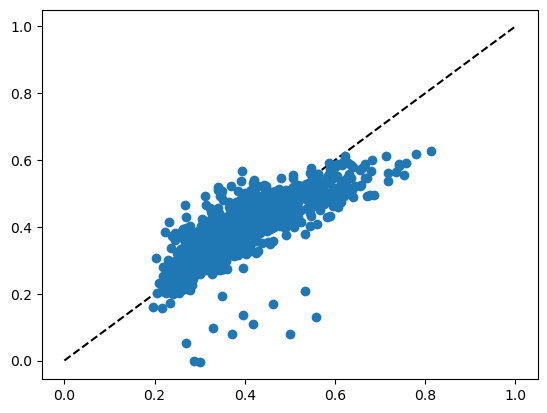

Primep1 loop:  40%|████      | 4/10 [11:56<17:52, 178.79s/it]

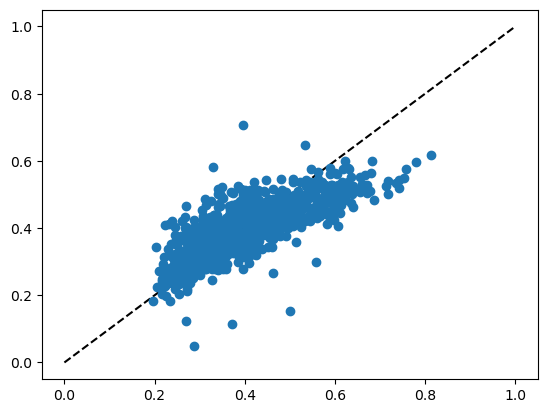

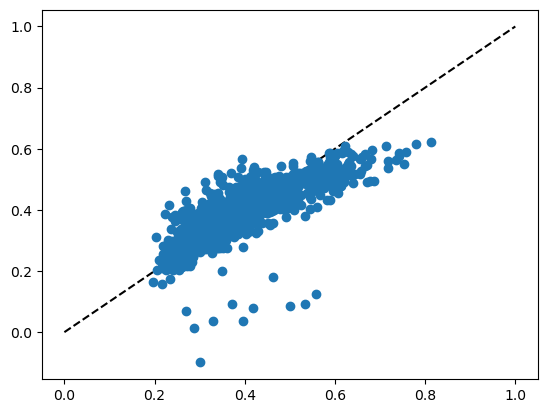

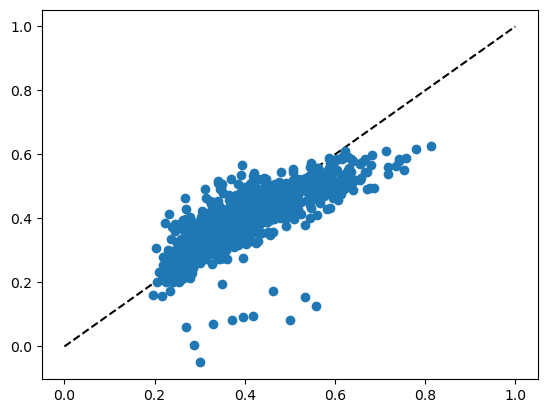

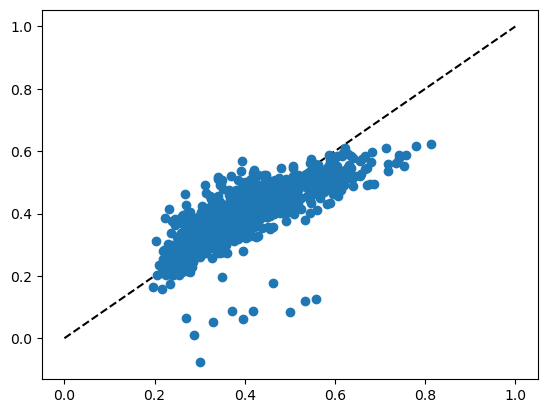

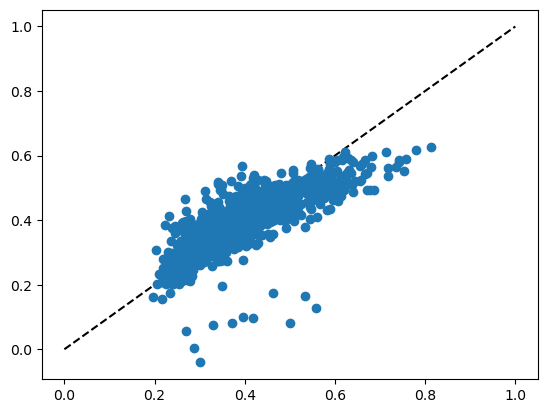

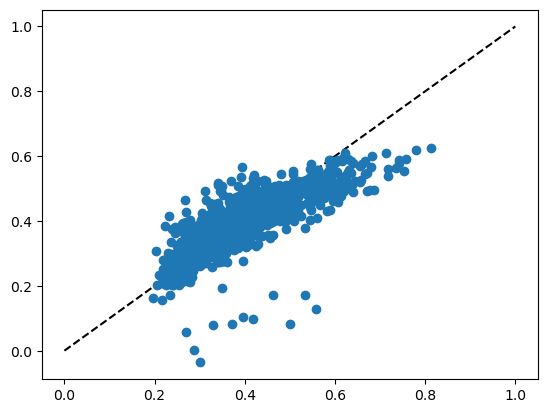

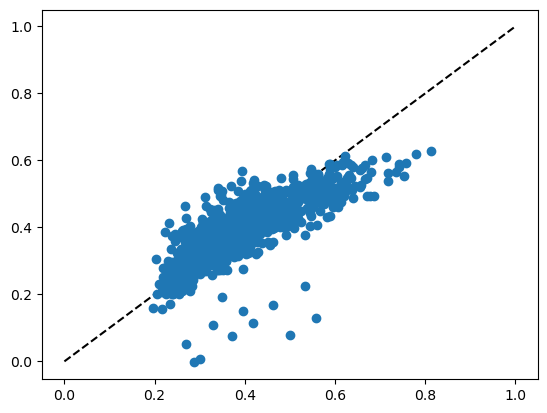

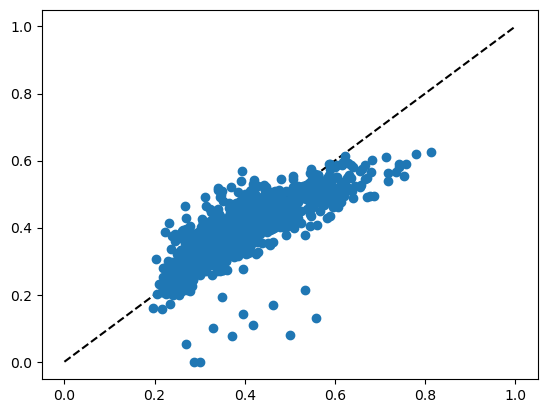

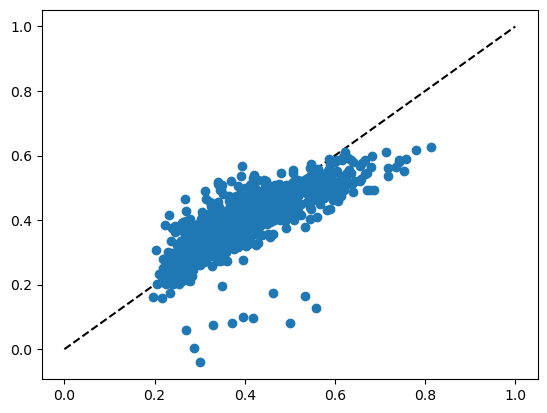

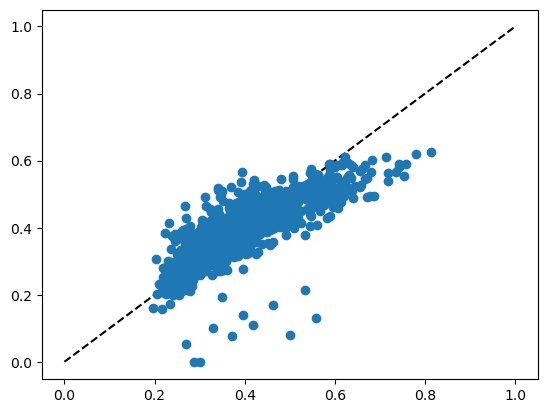

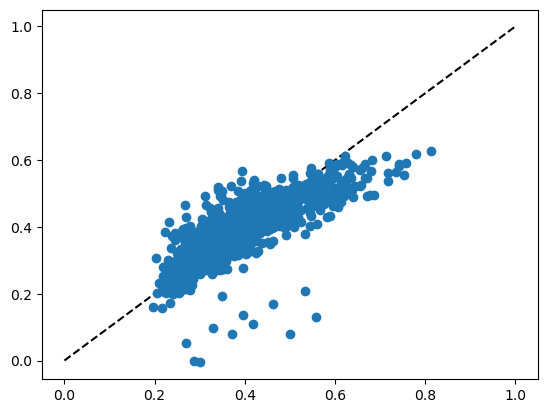

Primep1 loop:  50%|█████     | 5/10 [14:50<14:44, 176.95s/it]

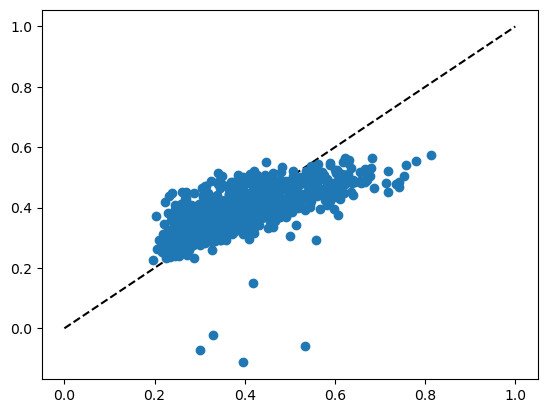

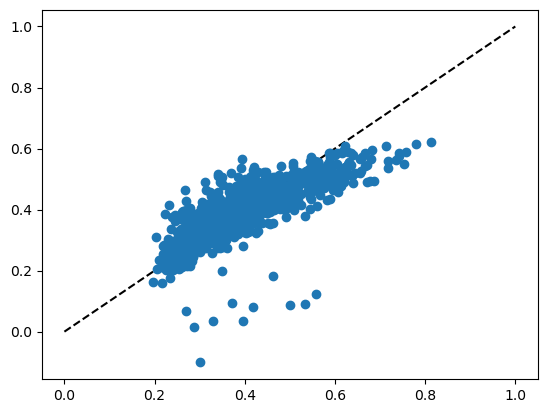

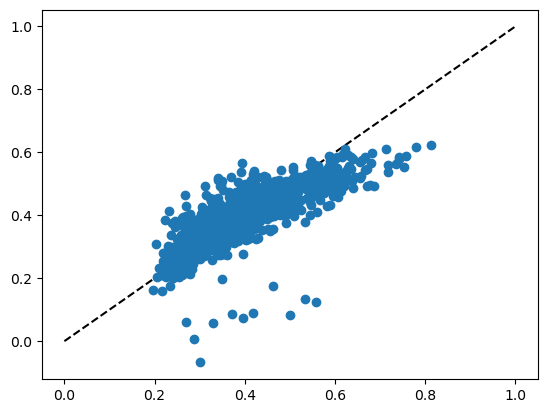

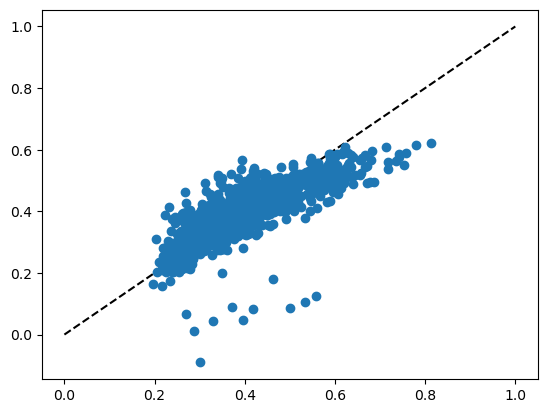

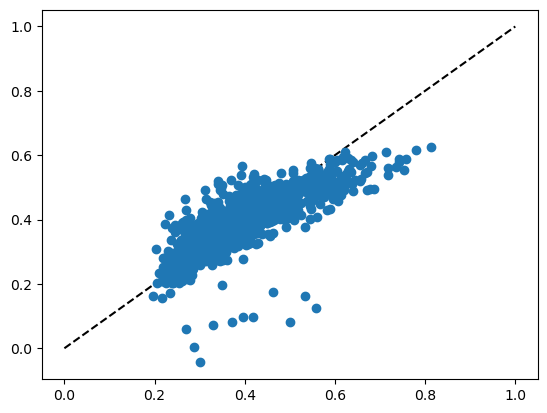

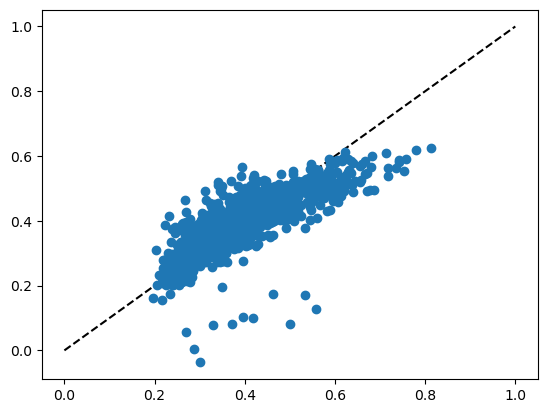

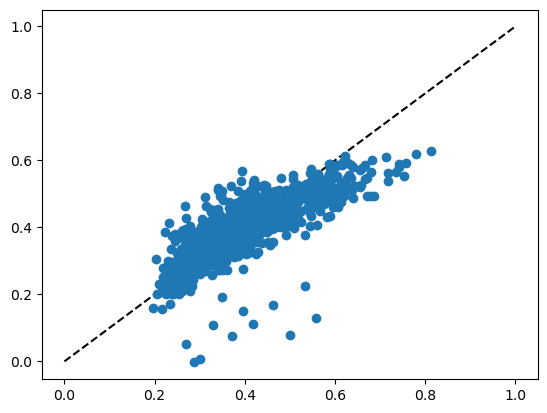

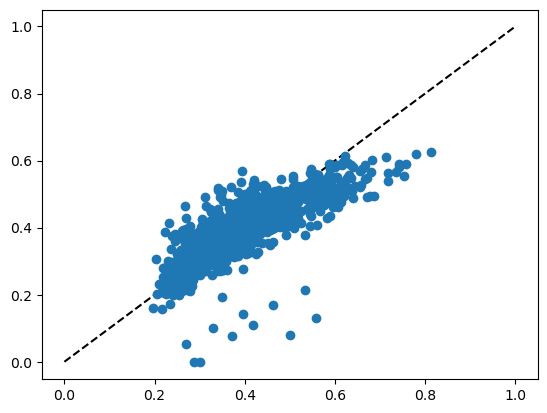

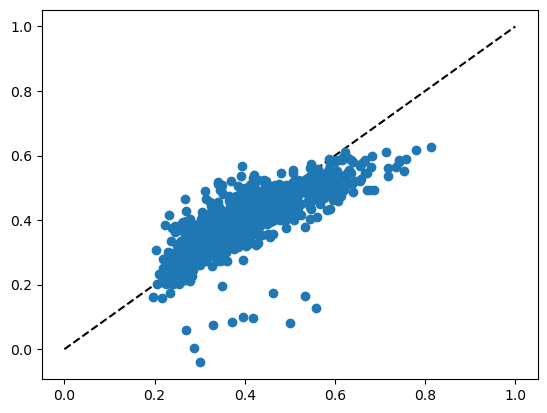

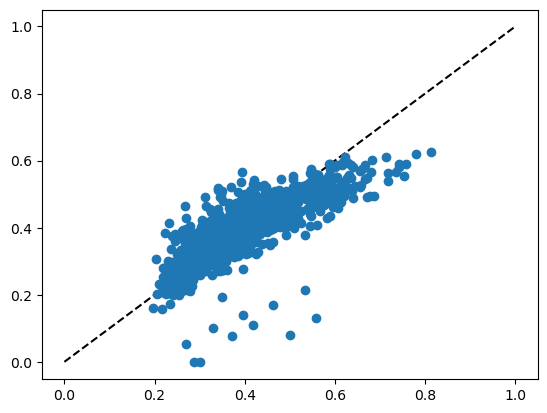

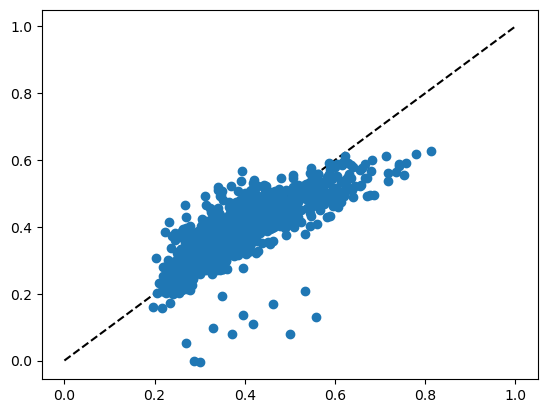

Primep1 loop:  60%|██████    | 6/10 [17:48<11:49, 177.30s/it]

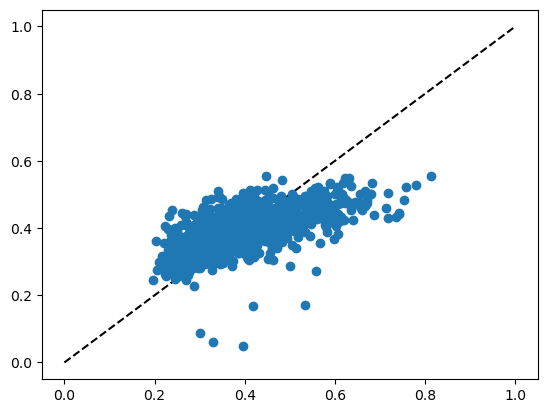

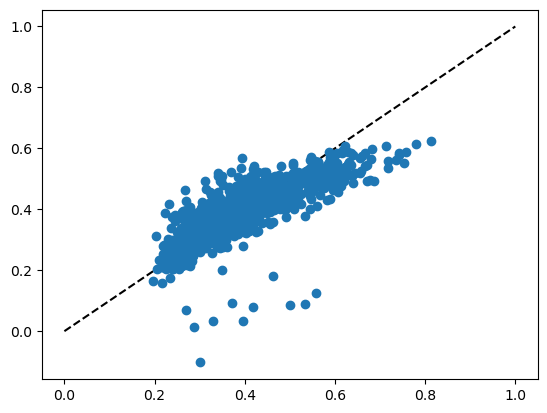

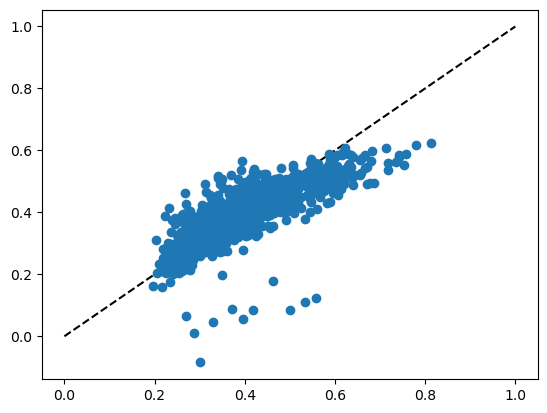

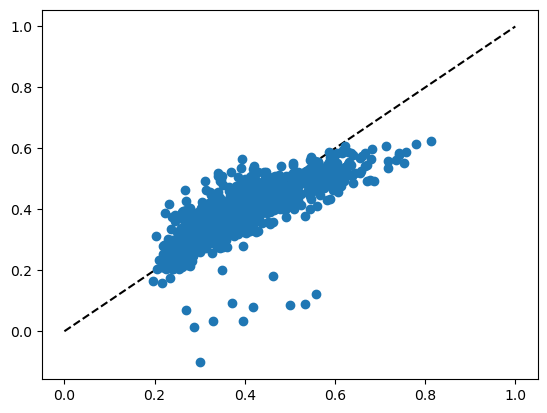

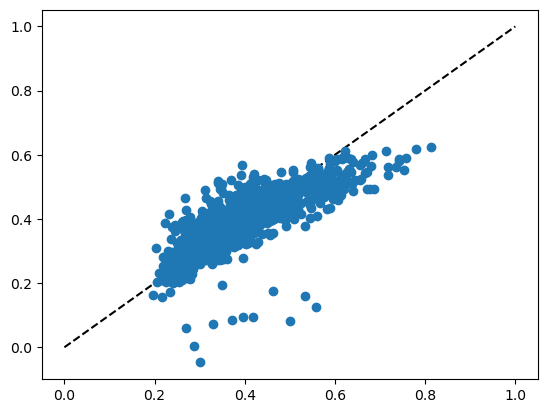

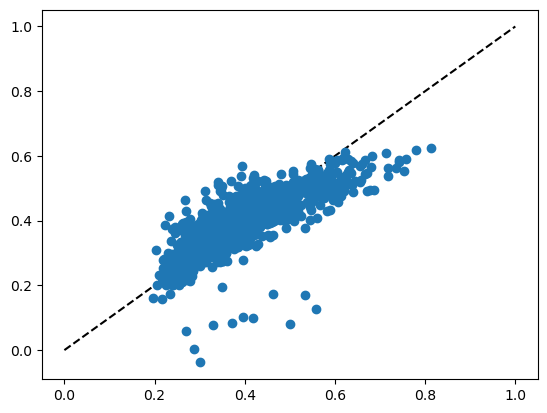

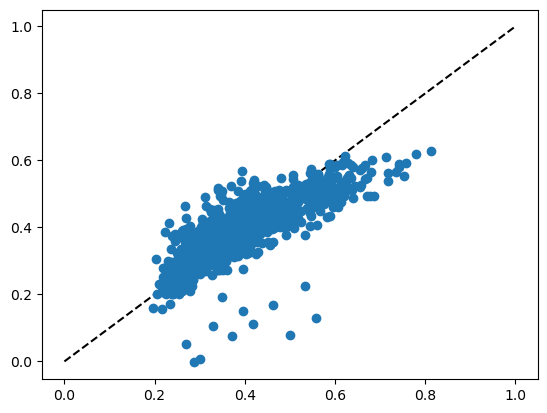

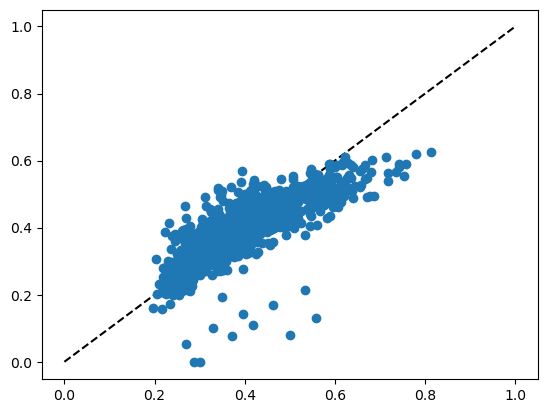

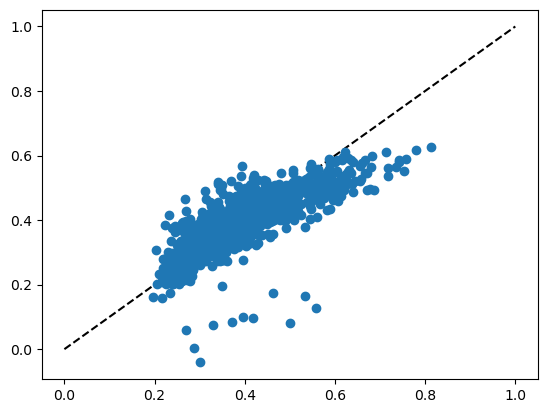

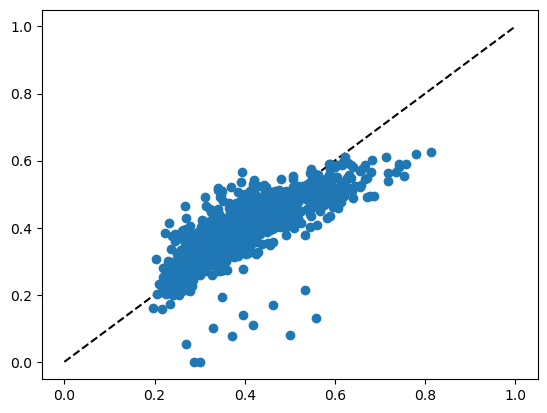

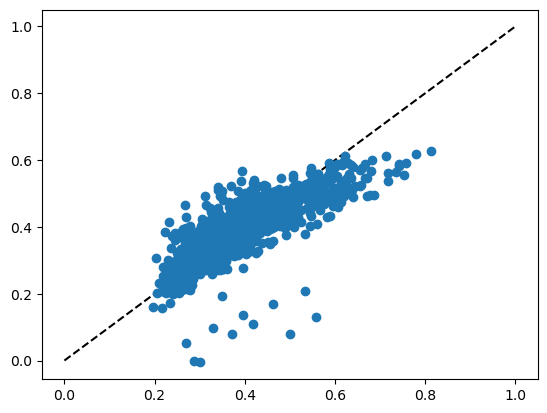

Primep1 loop:  70%|███████   | 7/10 [20:46<08:52, 177.63s/it]

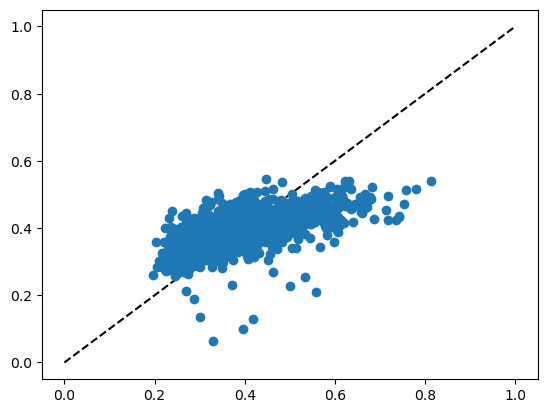

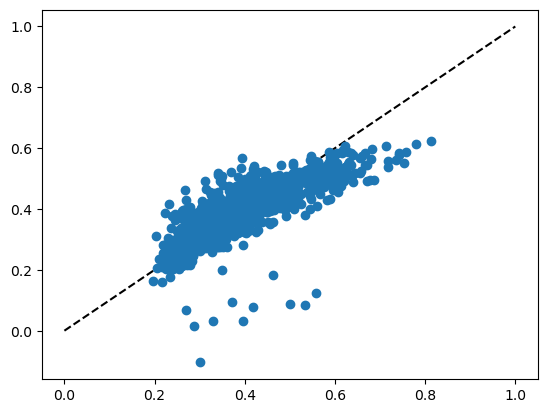

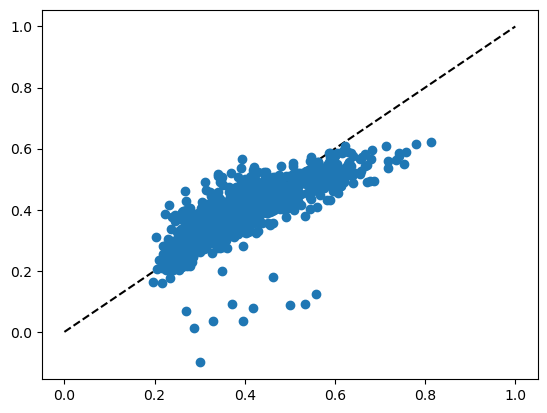

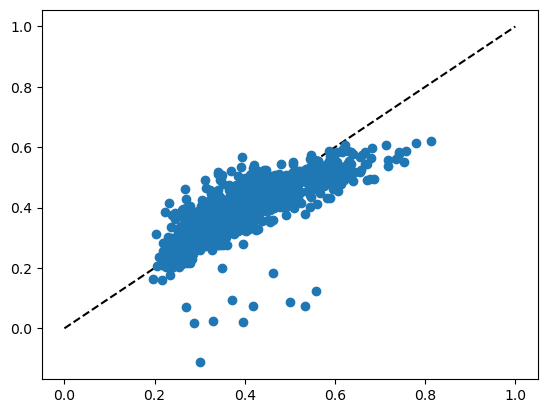

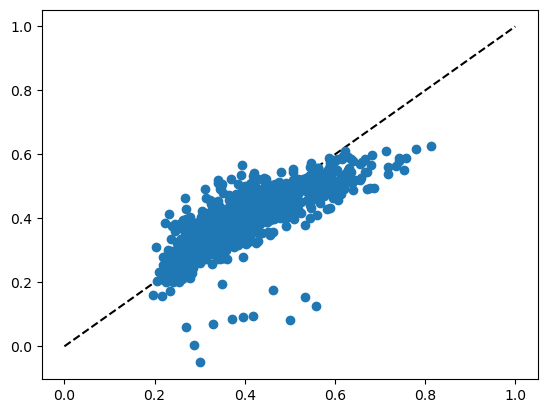

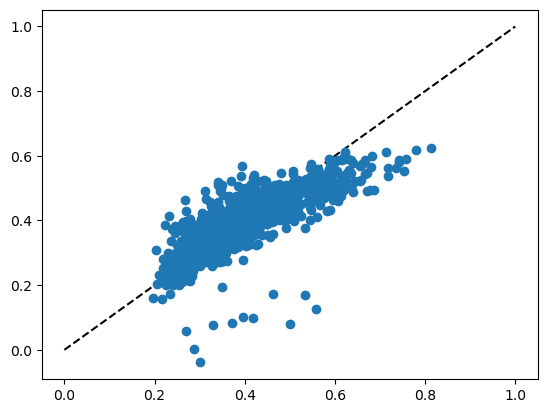

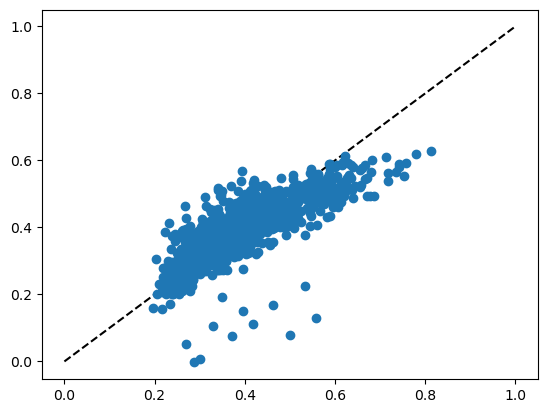

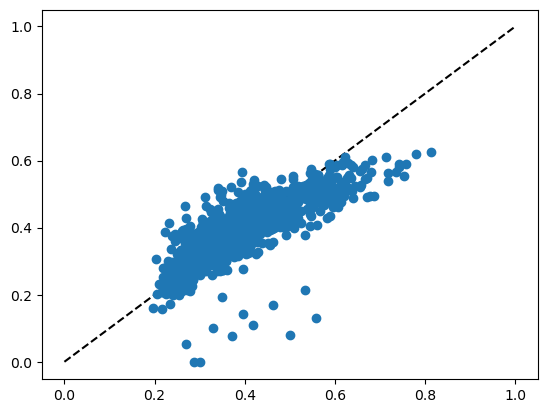

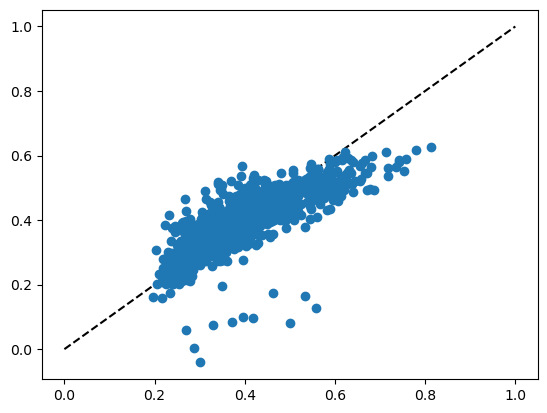

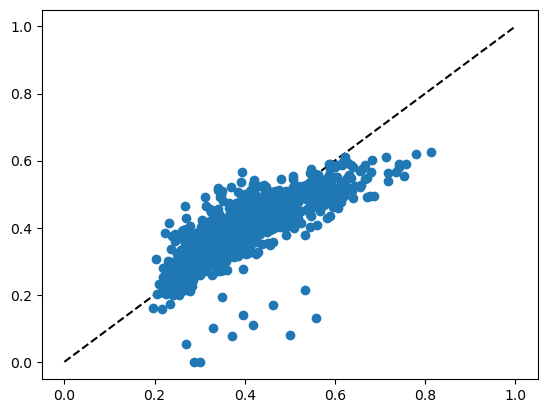

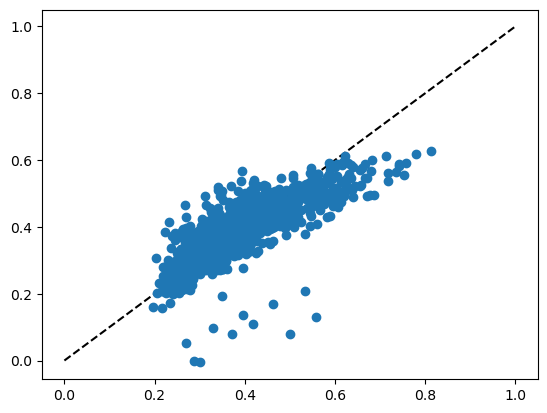

Primep1 loop:  80%|████████  | 8/10 [23:44<05:55, 177.57s/it]

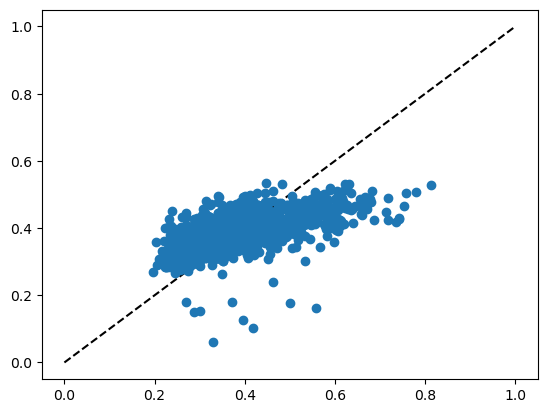

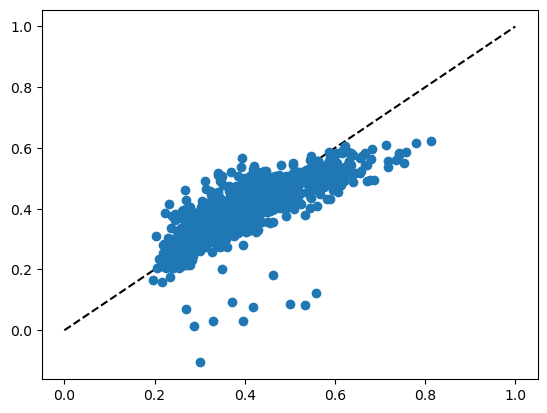

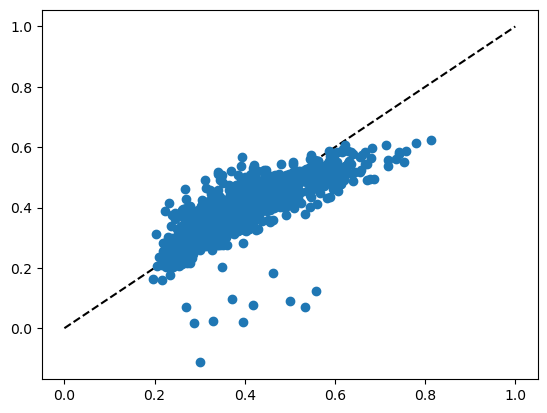

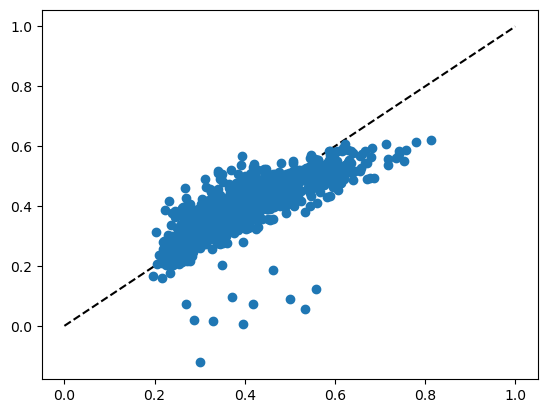

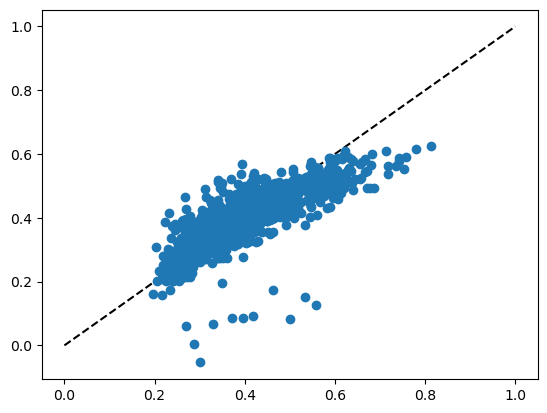

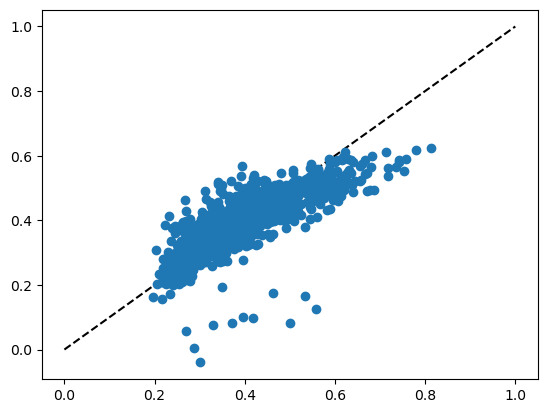

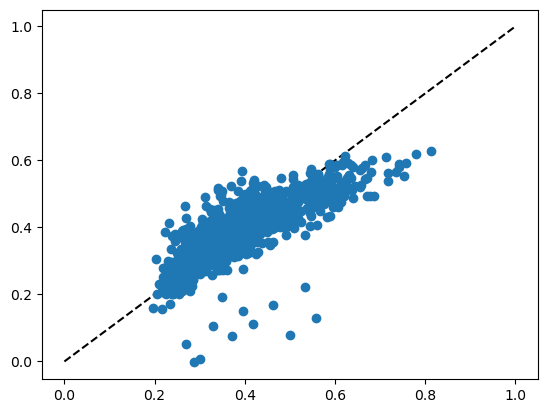

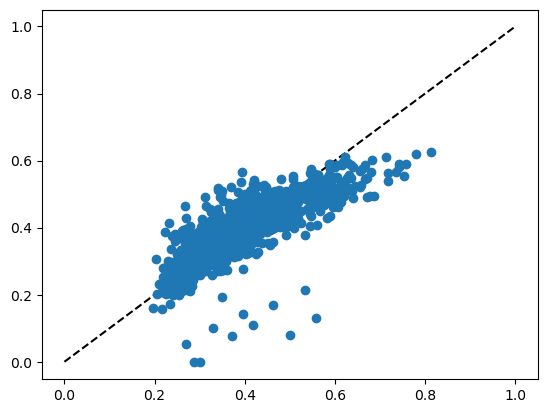

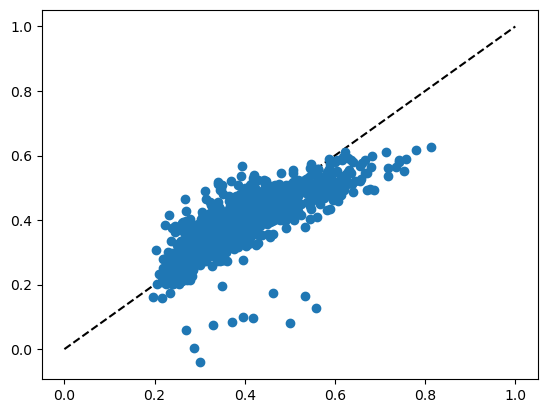

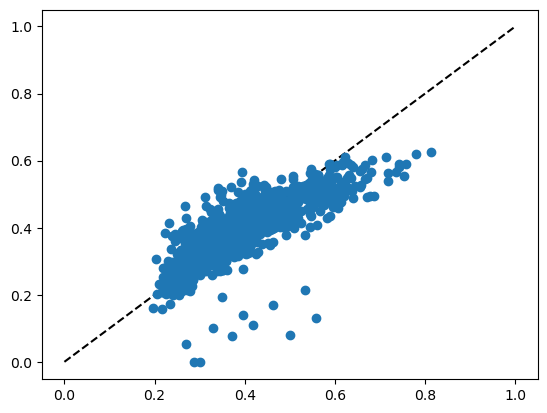

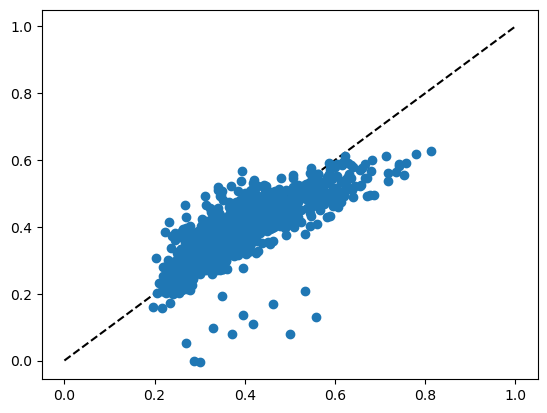

Primep1 loop:  90%|█████████ | 9/10 [26:47<02:59, 179.33s/it]

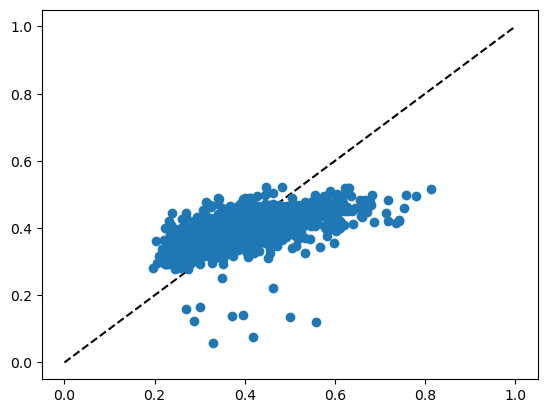

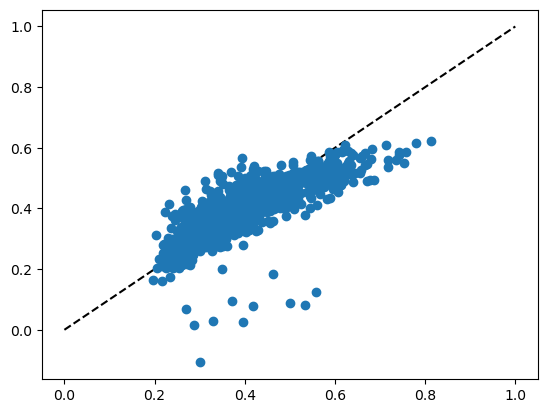

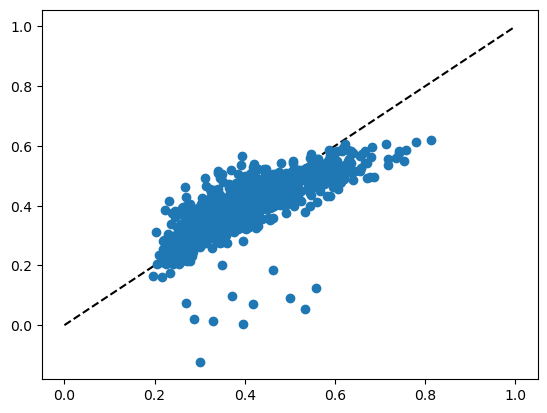

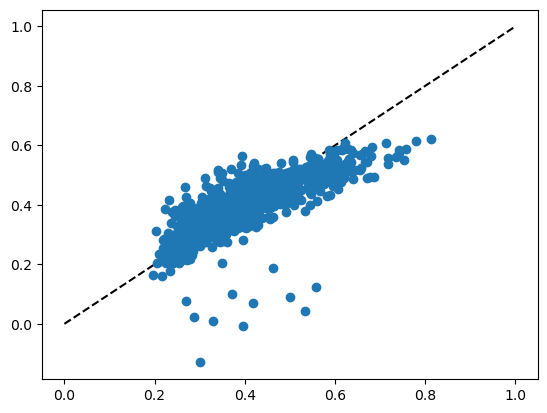

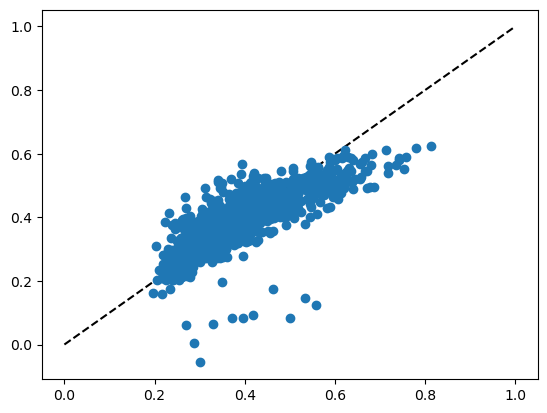

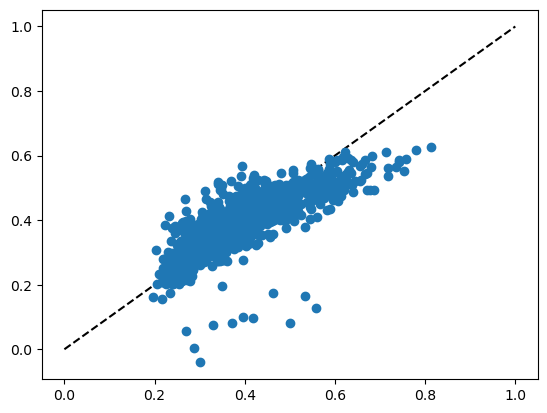

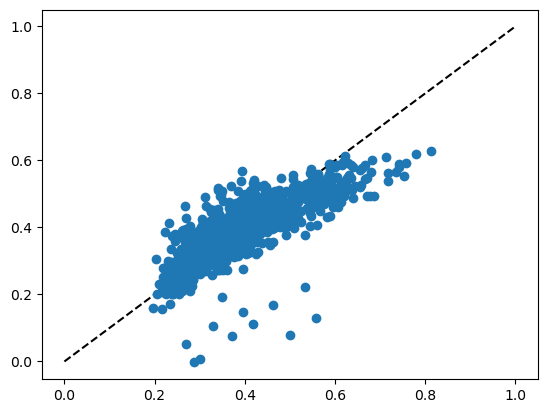

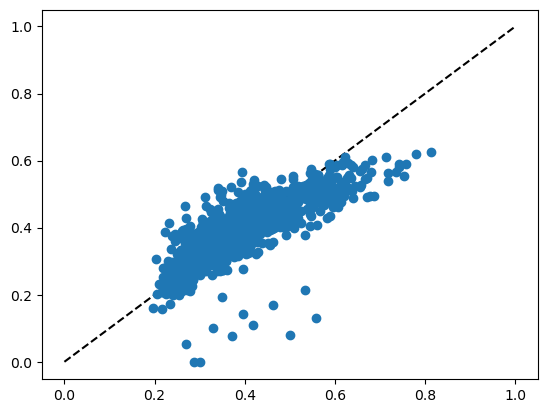

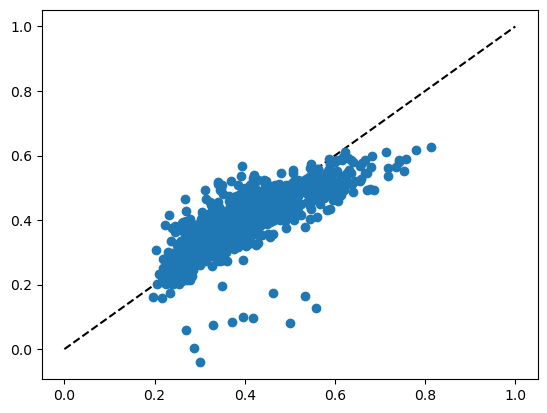

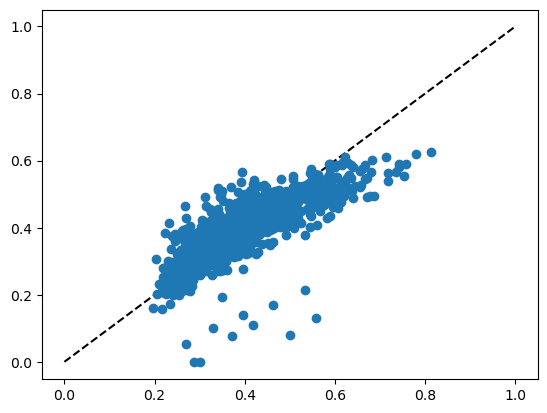

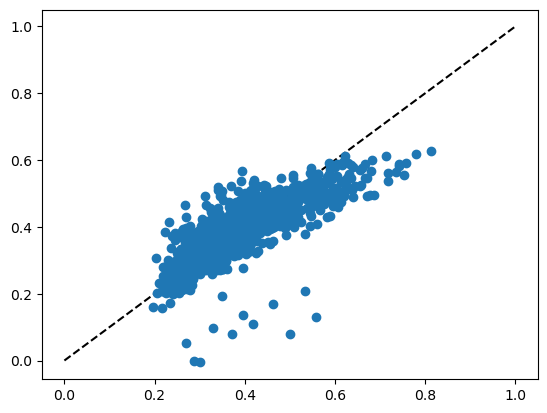

Primep1 loop: 100%|██████████| 10/10 [29:48<00:00, 178.82s/it]


In [9]:
from contextmanager import no_print
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 10

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

Nwarmup_list = np.arange(0,51,5)
Primep1_list = np.linspace(0.1,0.9,10)

nrmse_list = np.zeros((len(Primep1_list), len(Nwarmup_list)))

Primep1_grid, Nwarmup_grid = np.meshgrid(Primep1_list, Nwarmup_list, indexing='ij')

for i, Primep1 in enumerate(tqdm(Primep1_list,desc = 'Primep1 loop')):
    for  j,Nwarmup in enumerate(tqdm(Nwarmup_list,desc = ' Nwarmup loop')):
        with no_print():
            params['length_warmup'] = Nwarmup
            params['warmup_sample'] = Nwarmup*Nvirt

            spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=Primep1)
            transform = spn.gen_signal_fast_delayed_feedback

            nrmse = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transform,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)

            nrmse_list[i, j] = nrmse


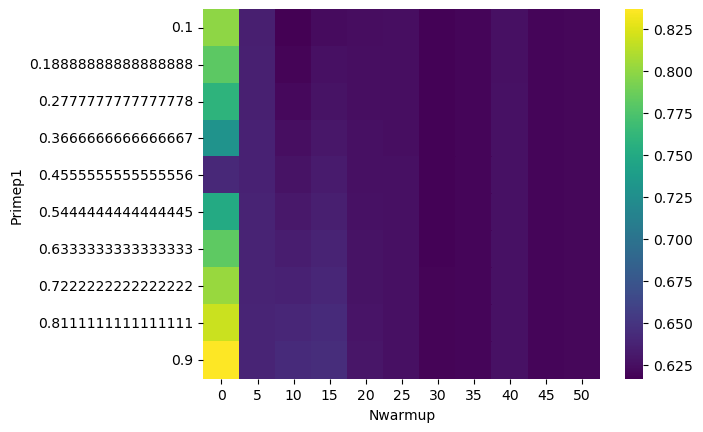

In [10]:
import seaborn as sns
import pandas as pd

data = {
    'Primep1': Primep1_grid.flatten(),
    'Nwarmup': Nwarmup_grid.flatten(),
    'NRMSE': nrmse_list.flatten()
}

df = pd.DataFrame(data)

plt.figure()
sns.heatmap(df.pivot('Primep1','Nwarmup','NRMSE'), cmap='viridis')
plt.show()

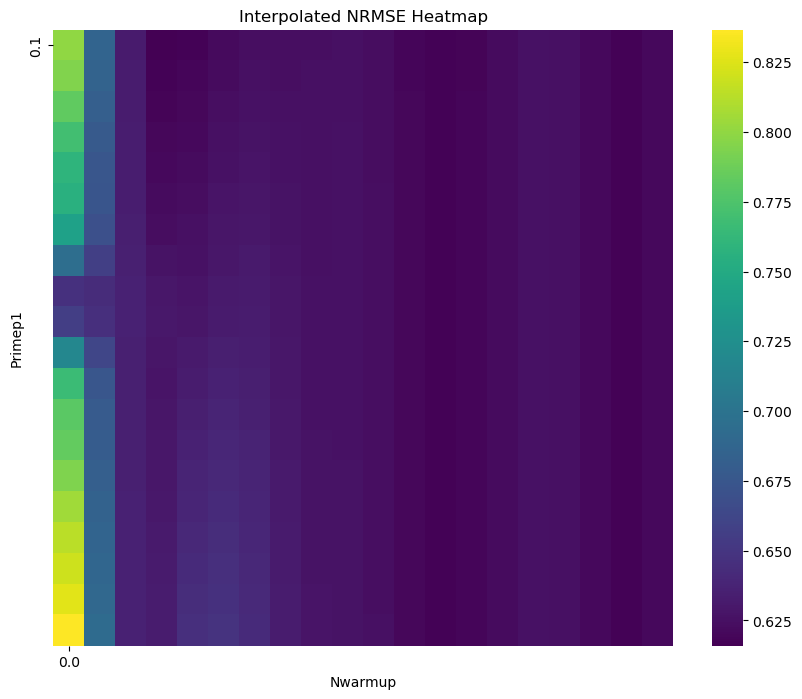

In [12]:
import numpy as np
from scipy.interpolate import interp2d
import seaborn as sns
import matplotlib.pyplot as plt

# 创建更密集的网格点
Primep1_dense = np.linspace(Primep1_list.min(), Primep1_list.max(), 20)
Nwarmup_dense = np.linspace(Nwarmup_list.min(), Nwarmup_list.max(), 20)

# 创建插值函数
f = interp2d(Nwarmup_list, Primep1_list, nrmse_list, kind='cubic')

# 计算插值结果
nrmse_dense = f(Nwarmup_dense, Primep1_dense)

# 创建新的数据框
data_dense = {
    'Primep1': np.repeat(Primep1_dense, len(Nwarmup_dense)),
    'Nwarmup': np.tile(Nwarmup_dense, len(Primep1_dense)),
    'NRMSE': nrmse_dense.flatten()
}
df_dense = pd.DataFrame(data_dense)

# 绘制高分辨率热力图
plt.figure(figsize=(10, 8))
sns.heatmap(df_dense.pivot('Primep1', 'Nwarmup', 'NRMSE'), 
            cmap='viridis',
            xticklabels=20,
            yticklabels=20)
plt.title('Interpolated NRMSE Heatmap')
plt.xlabel('Nwarmup')
plt.ylabel('Primep1')
plt.show()